# Проект по A/B - тестам.

In [ ]:
import pandas as pd
import numpy as np 
from scipy.stats import *
import seaborn as sns

### `chat_id ` из Телеграма:

In [ ]:
401141478

401141478

------------------

##  <ins>Задание 1.</ins>

### 0. Запосить у бота в Телеграме условие командой `/get_project1_desc`.

In [ ]:
data = pd.read_csv('/content/hist_telesales.csv')

In [ ]:
data.head()

,ID,Флаг дозвона,Флаг продажи,Расходы,PV,NPV
0,0,1,0,90,0,-90
1,1,0,0,5,0,-5
2,2,0,0,68,0,-68
3,3,1,0,22,0,-22
4,4,1,0,22,0,-22


In [ ]:
data.shape

(72161, 6)

### 1. Необходимо выбрать метрику и привести аргументацию.

Будем сравнивать NPV, так как эта колонка учитывает расходы – то есть позволяет вычислить ожидаемую доходность.

### 2. Альтернатива в критерии.

Предстоит выяснить, увеличивается ли среднее значение NPV при уменьшении тарифа. Поэтому будем использовать левостороннюю альтернативу в критерии.

Гипотеза $H_0: E(X) = E(Y)$, где\
X – NPV контроля (старая цена), \
Y – NPV теста \
\
Альтернатива $H_1: E(X) < E(Y)$

### 3.1. Каков размер выборки? Привести аргументацию и написать как получилось то или иное число.

**Статистические вводные:** \
Уровень значимости 5%. \
Мы хотели бы различать 5%-ное
изменение целевой метрики 
с вероятностью 80%. \

Рассчитаем MDE – изменение целевой метрики:

In [ ]:
MDE = 0.05 * np.mean(data.NPV); MDE

14.07299025789554

Рассчитаем размер выборки:

In [ ]:
n = 2 * np.var(data.NPV, ddof=1) * (norm.ppf(0.95) - norm.ppf(0.2))**2 / MDE**2
round(n)

28672

### 3.2. Необходимо запросить у бота в Телеграме выборку полученного размера командой `/get_project1_sample {размер выборки}` и вписать <ins>код выборки</ins>:

Код выборки: 41729.

In [ ]:
cont = pd.read_csv('/content/Контроль.csv')
cont.head()

,ID,Флаг дозвона,Флаг продажи,Расходы,PV,NPV
0,0,1,1,44,1530,1486
1,1,1,1,576,1201,625
2,2,1,1,459,2158,1699
3,3,0,0,86,0,-86
4,4,0,0,100,0,-100


In [ ]:
test = pd.read_csv('/content/Тест.csv')
test.head()

,ID,Флаг дозвона,Флаг продажи,Расходы,PV,NPV
0,0,0,0,13,0,-13
1,1,1,1,125,1209,1084
2,2,1,0,106,0,-106
3,3,1,1,180,1381,1201
4,4,0,0,74,0,-74


In [ ]:
np.mean(cont.NPV), np.mean(test.NPV)

(278.77587890625, 281.9436732700893)

Проведем t-test и выведем p-value:

In [ ]:
pv = ttest_ind(cont.NPV, test.NPV, equal_var=False, alternative='less')[1]; pv

0.28027847101790393

### 4. Принятие решения. Расписать подробно с аргументами.

Как видно, p-value = 0.28, что сильно выше заданного уровня значимости α = 0.05 (5%). \
Следовательно, гипотеза $H_1$ неверна. \
То есть доходность продукта не увеличится при уменьшении цены.

------------------

##  <ins>Задание 2.</ins>

### 0. Запросить у бота в Телеграме условие командой `/get_project2_desc`.

In [ ]:
data = pd.read_csv('/content/hist_credit_card.csv')

In [ ]:
data.head()

,ID,Возраст,Доход клиента,Вероятность банкротства,Флаг утилизации счёта,Расходы,PV КК,PV услуги,NPV
0,0,19,21620.835463,0.138061,0,102,0,0,-102
1,1,27,24897.990863,0.035508,1,409,11686,1754,13031
2,2,50,23989.526947,0.098793,0,16,0,0,-16
3,3,18,38442.409756,0.365661,1,788,13738,1578,14528
4,4,24,21291.521612,0.036909,1,1048,6594,2213,7759


In [ ]:
data.shape

(123255, 9)

### 1. Необходимо выбрать метрику и привести аргументацию.

Будем сравнивать NPV, так как эта колонка учитывает расходы – то есть позволяет вычислить ожидаемую доходность.

### 2. Альтернатива в критерии.

Предстоит выяснить, увеличивается ли среднее значение NPV при повышении тарифа. Поэтому будем использовать левостороннюю альтернативу в критерии.

Гипотеза $H_0: E(X) = E(Y)$, где\
X – NPV контроля (старая цена), \
Y – NPV теста \
\
Альтернатива $H_1: E(X) < E(Y)$


### 3. Нужно выбрать параметр(-ы), влияющий(-ие) на целевую метрику. Привести аргументацию.

Посмотрим на корреляции параметров скоринга с колонкой NPV:

In [ ]:
df = data.loc[:, ['Возраст', 'Доход клиента', 'Вероятность банкротства', 'NPV']]; df

,Возраст,Доход клиента,Вероятность банкротства,NPV
0,19,21620.835463,0.138061,-102
1,27,24897.990863,0.035508,13031
2,50,23989.526947,0.098793,-16
3,18,38442.409756,0.365661,14528
4,24,21291.521612,0.036909,7759
...,...,...,...,...
123250,32,26099.633927,0.110756,-47
123251,20,24579.749275,0.113920,15346
123252,36,34062.902531,0.247122,7890
123253,67,24609.838522,0.020752,7846


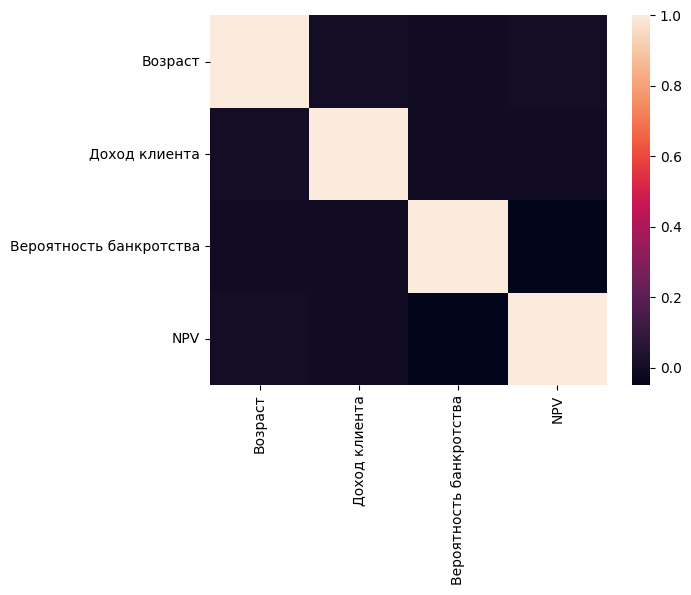

In [ ]:
sns.heatmap(df.corr());

По графику непонятно, какая корреляция сильнее. Проверим вручную:

In [ ]:
np.corrcoef(data.NPV, data["Возраст"])[0][1]

0.0037465367125478683

In [ ]:
np.corrcoef(data.NPV, data["Доход клиента"])[0][1]

-0.0022689121556165475

In [ ]:
np.corrcoef(data.NPV, data["Вероятность банкротства"])[0][1]

-0.04943299696548176

Как видно, наиболее сильная корреляция наблюдается между вероятностью банкротства и общей доходностью. \
\
Поэтому параметром, влияющим на целевую метрику, выберем вероятность банкротства клиента.

### 4.1. Каков размер выборки? Привести аргументацию и написать как получилось то или иное число.

**Статистические вводные:** \
Проверка однородности выбранного параметра
осуществяется с уровнем значимости 2%. \

Уровень значимости 5%. \

Мы хотели бы различать 8%-ное
изменение целевой метрики
с вероятностью 90%.

Рассчитаем MDE – изменение целевой метрики.

In [ ]:
MDE = 0.08 * np.mean(data.NPV); MDE

684.8169508742039

Рассчитаем размер выборки:

In [ ]:
n = 2 * np.var(data.NPV, ddof=1) * (norm.ppf(0.95) - norm.ppf(0.1))**2 / MDE**2
round(n)

17291

### 4.2. Необходимо запросить у бота в Телеграме выборку полученного размера командой `/get_project2_sample {размер выборки}` и вписать <ins>код выборки</ins>:

Код выборки: 57960.

In [ ]:
cont = pd.read_csv('/content/Контроль (1).csv')
cont.head()

,ID,Возраст,Доход клиента,Вероятность банкротства,Флаг утилизации счёта,Расходы,PV КК,PV услуги,NPV
0,0,58,21422.458309,0.101306,1,1075,9756,2008,10689
1,1,34,20241.203709,0.159528,0,29,0,0,-29
2,2,32,28294.910132,0.304616,1,71,5445,1398,6772
3,3,25,57413.031800,0.146928,0,1,0,0,-1
4,4,75,26248.422412,0.142844,1,842,6463,1385,7006


In [ ]:
test = pd.read_csv('/content/Тест (1).csv')
test.head()

,ID,Возраст,Доход клиента,Вероятность банкротства,Флаг утилизации счёта,Расходы,PV КК,PV услуги,NPV
0,0,73,23542.796941,0.166014,1,145,6711,2872,9438
1,1,59,20298.830599,0.258438,1,711,28199,1577,29065
2,2,18,22970.082345,0.110056,1,203,9684,2104,11585
3,3,19,20888.090902,0.366477,1,171,5663,1562,7054
4,4,48,20135.579510,0.235011,0,24,0,0,-24


### 5. Проверка на однородность, применение критерия. Принятие решения. Расписать подробно с аргументами.

Проверим параметр PV КК на однородность критерием Андерсона — Дарлинга:

In [ ]:
pv = anderson_ksamp([cont["Вероятность банкротства"], test["Вероятность банкротства"]]).pvalue; pv

<ipython-input-278-7e29213c754c>:1: UserWarning: p-value floored: true value smaller than 0.001
  pv = anderson_ksamp([cont["Вероятность банкротства"], test["Вероятность банкротства"]]).pvalue; pv


0.001

In [ ]:
pv < 0.02   # уровень значимости 2%

True

Выборки однородны! Теперь можно проводить t-test:

In [ ]:
pv = ttest_ind(cont.NPV, test.NPV, equal_var=False, alternative='less')[1]; pv

0.025465614900436008

In [ ]:
pv < 0.05

True

Замечательно! \
\
p-value меньше уровня значимости (5%), следовательно, мы отвергаем гипотезу $H_0$ и принимаем гипотезу $H_1$. \
\
То есть повышение тарифа действительно повысит доход с услуги.